In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from math import sqrt, pi, acos
from cmath import polar
# %matplotlib notebook

In [2]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

# Set Initial Vector

In [3]:
# initial_state = [1,0]   # Define initial_state as |0>
# initial_state = [0,1]   # Define initial_state as |1>
# initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>
# initial_state = [sqrt(3)/2, 1j/2]  # Define state |q_0>
# initial_state = [1/sqrt(3), 1j*sqrt(2/3)]  # Define state |q_0>
initial_state = [1j*1/sqrt(3), 1j*sqrt(2/3)]  # Define state |q_0>

array_to_latex(initial_state, pretext="\\text{Initial State} = ")

<IPython.core.display.Math object>

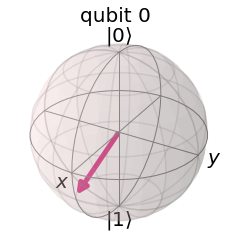

In [4]:
plot_bloch_multivector(initial_state)

# Converting State Vectors to Bloch Spheres

In [5]:
def StateVec2Bloch(inp):
    alpha = inp[0]
    beta = inp[1]
    
    r_alpha, ph_alpha = polar(alpha)
    r_beta, ph_beta = polar(beta)
    
    phi = ph_beta - ph_alpha
    theta = 2*acos(r_alpha)
    
    return [1, theta, phi]

[1, 1.9106332362490184, 0.0]


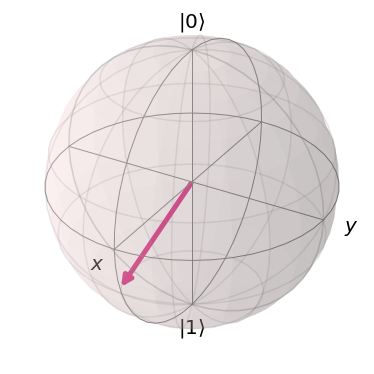

In [6]:
convert = StateVec2Bloch(initial_state)
print(convert)
plot_bloch_vector(convert, coord_type= "spherical")

# Representing Qubit States

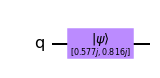

In [7]:
circuit = QuantumCircuit(1)  # Create a quantum circuit with one qubit
circuit.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
job = assemble(circuit)     # Create a JOB from the circuit for the simulator to run

circuit.draw("mpl")  # Let's view our circuit

<IPython.core.display.Math object>

Counts     :  {'0': 0.333333333333333, '1': 0.666666666666667}


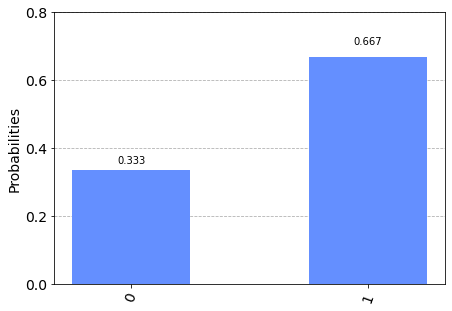

In [8]:
result = backend.run(job).result() # Do the simulation and return the result
out_state = result.get_statevector()
counts = result.get_counts()
# print("StateVector: ",out_state) # Display the output state vector
array_to_latex(out_state, pretext="\\text{Statevector} = ")
print("Counts     : ",counts)
plot_histogram(counts)